Import necessary libraries 

In [1]:
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt
import numpy as np


C:\Users\Riley\AppData\Local\Temp\ipykernel_11672\1632517892.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

df = pd.read_csv("CS98XRegressionTrain.csv")
df.head()


,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [12]:
# Find the empty/null cells
df.isnull().sum()

Id            0
title         0
artist        0
top genre    15
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [13]:
mask = df["top genre"].isnull()
empty_rows=df[mask]
empty_rows

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
8,9,Someone Elses Roses,Joan Regan,NaN,2019,100,14,29,-10,15,32,143,89,3,34
26,27,Drinks On The House,Green Martini Keys,NaN,2016,97,16,57,-16,11,15,181,100,5,28
72,73,Pachuko Hop,Ike Carpenter Orchestra,NaN,2006,83,53,48,-9,34,80,135,59,3,28
90,91,Little Things Means A Lot,Jayne Mansfield,NaN,2008,109,29,70,-15,16,63,172,36,4,29
98,99,The Lady Is A Tramp,Mel Torme & the Mel-Tones,NaN,2016,138,60,41,-8,41,54,170,81,6,40
220,221,If I Give My Heart To You,The Teddy Bears,NaN,2011,113,29,49,-10,12,29,118,86,3,40
252,253,Happy Days And Lonely Nights,Suzi Miller And Johnson Brothers,NaN,2012,142,38,65,-8,13,69,146,43,3,27
265,266,Stairway Of Love,Terry Dene,NaN,2015,93,62,62,-7,25,86,120,55,4,27
266,267,You,Ten Sharp,NaN,1991,174,90,41,-8,19,67,273,43,3,61


In [14]:
#How many catagories 
df["top genre"].value_counts().count()

86

Genres (outliers removed)

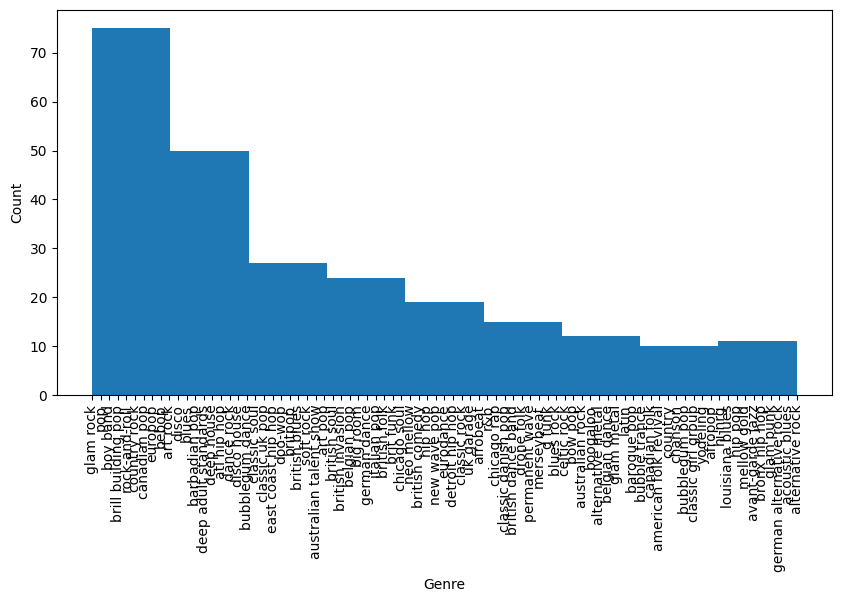

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has a column named 'top genre'
genres = df["top genre"]

# Convert all non-string genres to string (this will also convert NaNs to the string 'nan')
genres = genres.astype(str)

# Define the genres to drop as outliers
genres_to_drop = ["adult standards", "album rock", "dance pop"]

# Filter out the rows where 'top genre' is in the list of genres to drop
filtered_genres = genres[~genres.isin(genres_to_drop)]

# Now before plotting, let's remove any 'nan' values that got converted to string
filtered_genres = filtered_genres[filtered_genres != 'nan']

# Create the histogram, use a reasonable number of bins or let matplotlib decide
plt.figure(figsize=(10, 5))  # You can adjust the size as needed
plt.hist(filtered_genres, bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)
# Display the plot
plt.show()


In [16]:
highest_artists = df["artist"].value_counts()
print(highest_artists)

artist
Elton John          9
Queen               7
ABBA                7
The Beatles         6
Rihanna             5
                   ..
Max Bygraves        1
Robbie Williams     1
Johnny Tillotson    1
Harpo               1
*NSYNC              1
Name: count, Length: 345, dtype: int64


C:\Users\Riley\AppData\Local\Temp\ipykernel_22728\875281843.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  words_df.value_counts().head(20).drop('-')


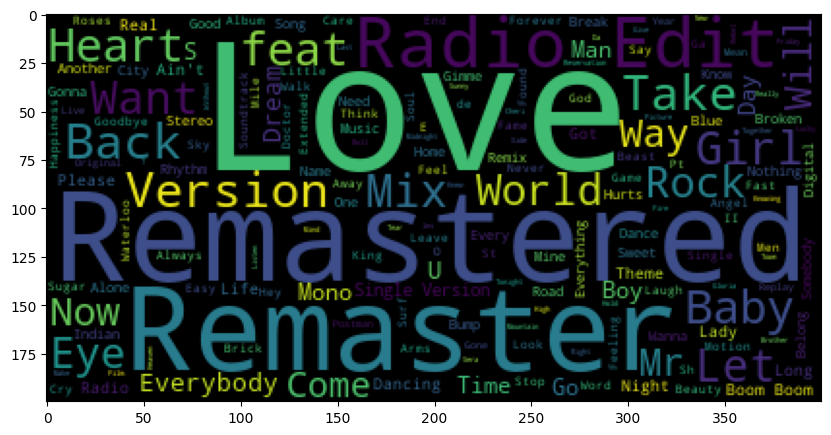

In [17]:
from wordcloud import WordCloud
titles = df["title"].values
words = []
for title in titles:
    words+=(title.split())
words_df = pd.DataFrame(words) 

words_df.value_counts().head(20).drop('-')

wc = WordCloud().generate(words_df.to_string())
plt.figure(figsize=(10,10))
plt.imshow(wc)






Where were we:

try and find a correlation between popularity and word count

Check if theres a heatmap in the numerical values of the thing

In [18]:
import seaborn as sns
numbers = df.drop(["Id","title","artist","top genre"],axis=1)

corr = numbers.corr()
sns.heatmap(corr)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


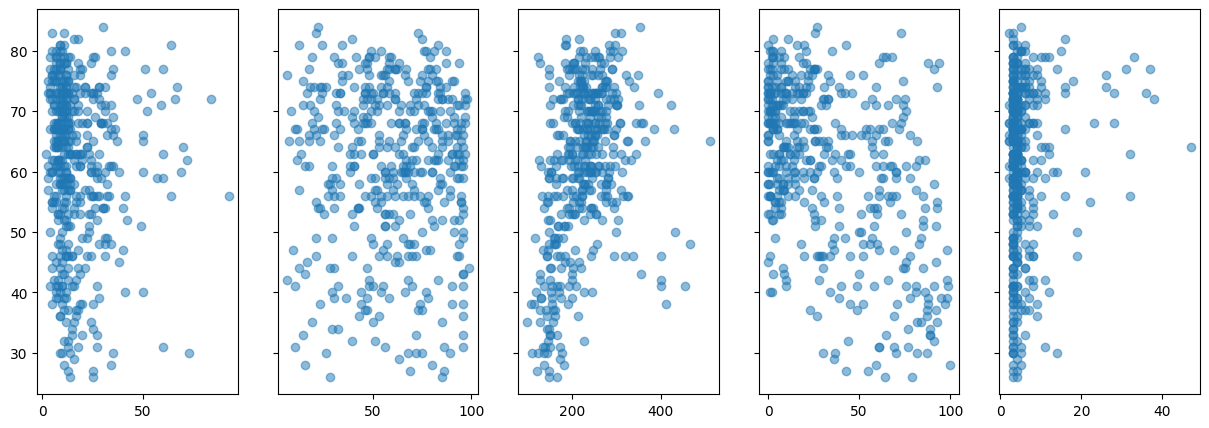

In [ ]:

fig, axs = plt.subplots(1,5,figsize=(15, 5), sharey=True)
axs[0].scatter(df["live"],df["pop"],alpha=0.5)
axs[1].scatter(df["val"],df["pop"],alpha=0.5)
axs[2].scatter(df["dur"],df["pop"],alpha=0.5)
axs[3].scatter(df["acous"],df["pop"],alpha=0.5)
axs[4].scatter(df["spch"],df["pop"],alpha=0.5)

df.head()

In [19]:
converted_catagorical = df.drop(columns=["title","artist"])
converted_catagorical = pd.get_dummies(converted_catagorical,dtype=float,prefix='genre')
converted_catagorical.join(df[["title","artist"]])
converted_catagorical.dropna()
converted_catagorical.to_csv('test.csv')



TRY and get a graph where the y(target) is popularity and the x series are the numerical values of the dataset. Should help with regression 

In [6]:
from sklearn.preprocessing import StandardScaler
numerical_only = df[["bpm","nrgy","dnce","dB","live","val","dur","acous","spch"]]

scaler = StandardScaler()
print(scaler.fit(numerical_only))


for column in numerical_only.columns[:-1]:  # Exclude the 'pop' column itself
    plt.scatter(numerical_only[column], numerical_only['pop'], label=column)



plt.xlabel("Value")
plt.ylabel("Popularity")
plt.title("Scatter Plot of Various Features vs Popularity")
plt.legend()
plt.show()

StandardScaler()


KeyError: 'pop'